Make analysis of survey evolution in time

In [1]:
import sys, os
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

In [2]:
import lsst.sims.maf.db as db
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as mb
from lsst.sims.utils import Site
from lsst.sims.utils import calcLmstLast

In [3]:
# o = db.OpsimDatabase(os.path.expanduser('~/Data/db/astro-lsst-01_2013.db'))
# o = db.OpsimDatabase(os.path.expanduser('~/Data/db/colossus_2296.db'))
o = db.OpsimDatabase(os.path.expanduser('~/Data/db/astro_lsst_01_1000_sqlite.db'))
propids, proptags = o.fetchPropInfo()
wfdfields = o.fetchFieldsFromFieldTable(proptags['WFD'])
wfdWhere = o.createSQLWhere('WFD', proptags)

dd_fields = o.fetchFieldsFromFieldTable(proptags['DD'])
dd_Where = o.createSQLWhere('DD', proptags)

In [23]:
# Pick a (start/end] night
night_start = 0
night_end = 72
# sql = '(night > %i and night <= %i)' % (night_start, night_end)
# d = o.query_columns('SummaryAllProps', colnames=['observationId', 'night', 
#                                                  'observationStartMJD', 'observationStartLST', 'fieldRA', 
#                                                  'fieldDec','filter','altitude'], 
#                     sqlconstraint=sql)
# tnow = d['observationStartMJD'][0]


In [27]:
m = metrics.CountMetric('fieldRA', metricName='Total N Visits', )
s = slicers.HealpixSlicer(nside=64) #latCol='zenithDistance', lonCol='azimuth')
filter_list = ['r', 'g', 'i', 'z', 'y', 'u']
plotFuncs=[plots.BaseSkyMap()]
bundle_dic={}

for obs_filter in filter_list:
    sql = '(night > %i and night <= %i) and (%s) and filter = "%s"' % (night_start, 
                                                                       night_end, 
                                                                       wfdWhere,
                                                                      obs_filter)    
    plotDict = {'colorMin':0, 'colorMax': 10, 'xMin':0, 'xMax':10,
                'figsize':(10, 8), 'xlabel':'Number of visits', 'raCen': 0.,
                'title': 'All observations in filter %s, WFD' % obs_filter}

    bundle_dic['filter_%s'%obs_filter] = mb.MetricBundle(m, s, sql, 
                                                         summaryMetrics=[metrics.SumMetric()], 
                                                         plotDict=plotDict, 
                                                         plotFuncs=plotFuncs)

bdict = mb.MetricBundleGroup(bundle_dic, o)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [28]:
# g = mb.MetricBundleGroup(bdict, o, 'ranking', None)
# g.runAll()
bdict.runAll()

Querying database SummaryAllProps with constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "z" for columns ['fieldDec', 'fieldRA']
Found 26657 visits
Running:  ['filter_z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "u" for columns ['fieldDec', 'fieldRA']
Found 1466 visits
Running:  ['filter_u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "y" for columns ['fieldDec', 'fieldRA']
Found 12139 visits
Running:  ['filter_y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "i" for columns ['fieldDec', 'f

/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:261: UserWarning: No data matching constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "i"
  warnings.warn('No data matching constraint %s' % constraint)
/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:265: UserWarning:  This means skipping metrics ['Total N Visits : (night > 0 and night < 72) and (proposalId 3) and  i : HealpixSlicer']
  warnings.warn(' This means skipping metrics %s' % metricsSkipped)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "r" for columns ['fieldDec', 'fieldRA']


/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:261: UserWarning: No data matching constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "r"
  warnings.warn('No data matching constraint %s' % constraint)
/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:265: UserWarning:  This means skipping metrics ['Total N Visits : (night > 0 and night < 72) and (proposalId 3) and  r : HealpixSlicer']
  warnings.warn(' This means skipping metrics %s' % metricsSkipped)


Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "z"" constraint now.


/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/plots/spatialPlotters.py:530: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(plotDict['bgcolor'])


Plotting complete.
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "u"" constraint now.
Plotting complete.
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "y"" constraint now.
Plotting complete.
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "i"" constraint now.
Plotting complete.
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "g"" constraint now.


/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/plots/plotHandler.py:527: UserWarning: MetricBundle (opsim_Total_N_Visits_night_gt_0_and_night_lt_72_and_proposalId_3_and_i_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


Plotting complete.
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "r"" constraint now.
Plotting complete.


/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/plots/plotHandler.py:527: UserWarning: MetricBundle (opsim_Total_N_Visits_night_gt_0_and_night_lt_72_and_proposalId_3_and_r_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


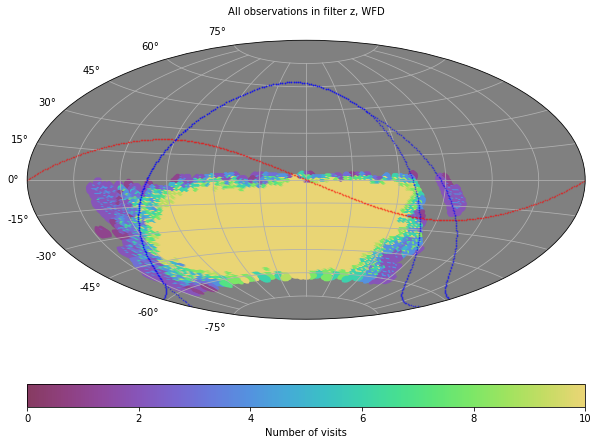

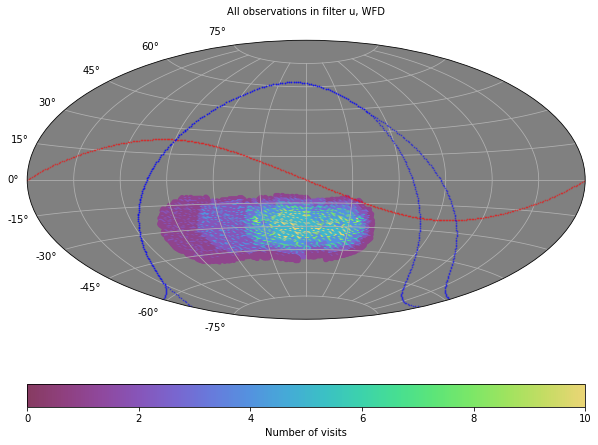

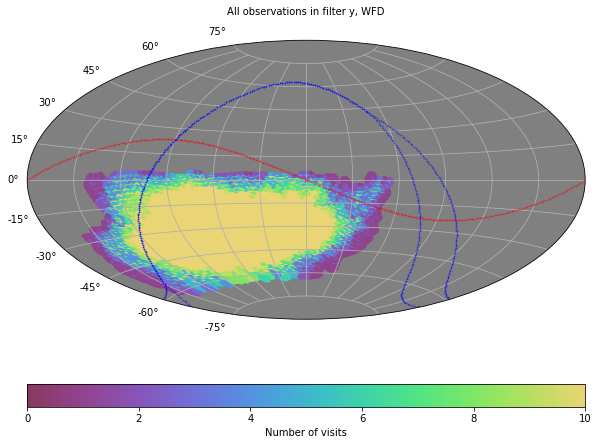

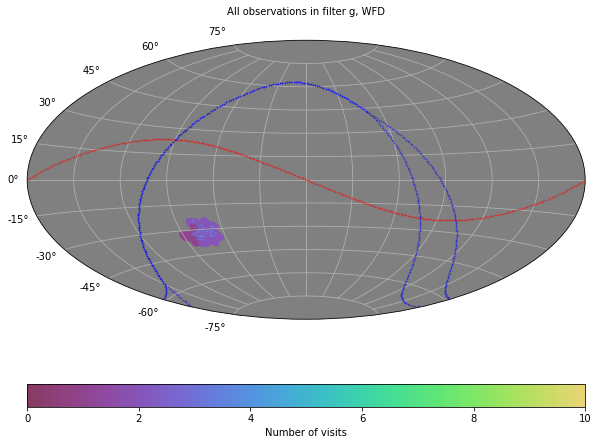

In [30]:
# bundle.plot(plotFunc=plots.BaseSkyMap(),savefig=True)
bdict.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "z" for columns ['azimuth', 'fieldRA', 'altitude']
Found 26657 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "u" for columns ['azimuth', 'fieldRA', 'altitude']
Found 1466 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "y" for columns ['azimuth', 'fieldRA', 'altitude']
Found 12139 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (night

/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:261: UserWarning: No data matching constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "i"
  warnings.warn('No data matching constraint %s' % constraint)
/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:265: UserWarning:  This means skipping metrics ['Total N Visits : (night > 0 and night < 72) and (proposalId 3) and  i : HealpixSlicer']
  warnings.warn(' This means skipping metrics %s' % metricsSkipped)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "r" for columns ['azimuth', 'fieldRA', 'altitude']
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "z"" constraint now.


/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:261: UserWarning: No data matching constraint (night > 0 and night <= 72) and (proposalId = 3) and filter = "r"
  warnings.warn('No data matching constraint %s' % constraint)
/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:265: UserWarning:  This means skipping metrics ['Total N Visits : (night > 0 and night < 72) and (proposalId 3) and  r : HealpixSlicer']
  warnings.warn(' This means skipping metrics %s' % metricsSkipped)
/Users/tribeiro/lsst_stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/tribeiro/lsst_stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py

Plotting complete.
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "u"" constraint now.
Plotting complete.
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "y"" constraint now.
Plotting complete.
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "i"" constraint now.
Plotting complete.
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "g"" constraint now.


/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/plots/plotHandler.py:527: UserWarning: MetricBundle (opsim_Total_N_Visits_night_gt_0_and_night_lt_72_and_proposalId_3_and_i_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


Plotting complete.
Plotting figures with "(night > 0 and night <= 72) and (proposalId = 3) and filter = "r"" constraint now.
Plotting complete.


/Users/tribeiro/lsst_stack/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/sims_maf/2.4.0.sims/python/lsst/sims/maf/plots/plotHandler.py:527: UserWarning: MetricBundle (opsim_Total_N_Visits_night_gt_0_and_night_lt_72_and_proposalId_3_and_r_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


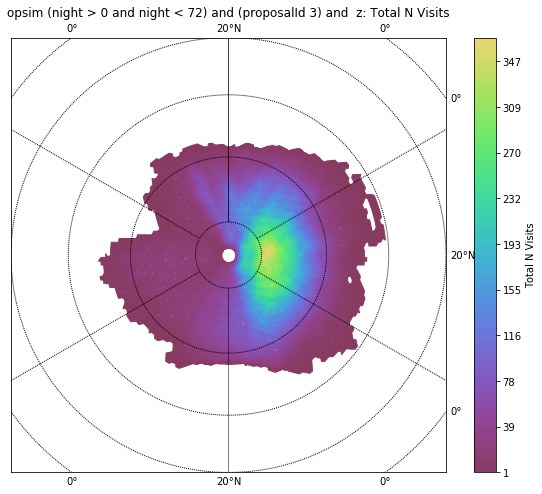

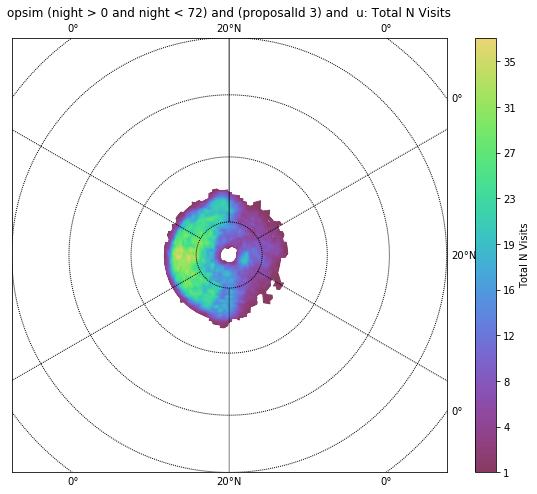

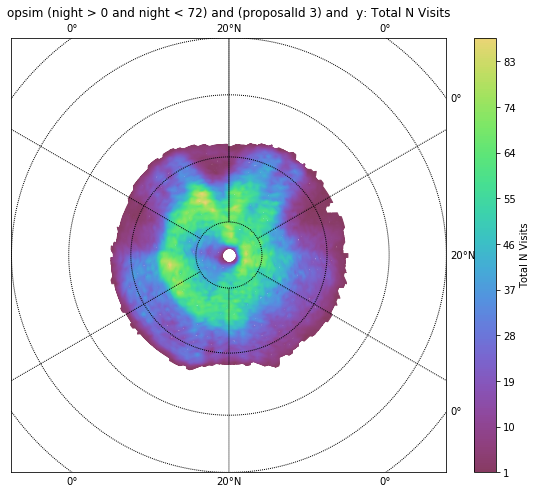

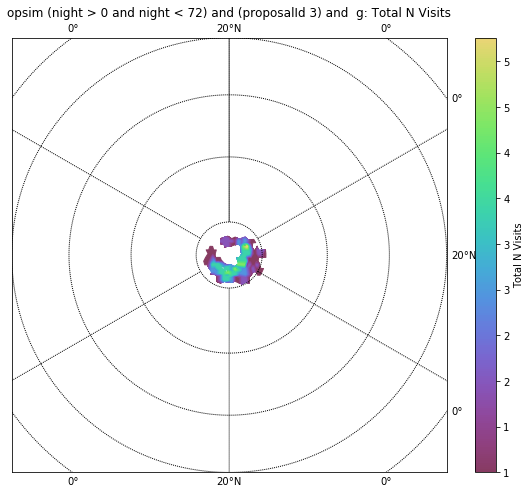

In [31]:
slicer = slicers.HealpixSlicer(latCol='zenithDistance', lonCol='azimuth', nside=64)
plotFuncs=[plots.LambertSkyMap()]
plotDict = {'figsize':(10, 8),'colorMin':0, 'colorMax': 30 } #, 'xMin':0, 'xMax':10}
plotDict = {'figsize':(10, 8)} #, 'xMin':0, 'xMax':10}
bundle_dict = {}
for obs_filter in filter_list:
    sql = '(night > %i and night <= %i) and (%s) and filter = "%s"' % (night_start, 
                                                                       night_end, 
                                                                       wfdWhere,
                                                                      obs_filter)    

    bundle_dict[obs_filter] = mb.MetricBundle(m, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = mb.MetricBundleGroup(bundle_dict, o)
bg.runAll()
bg.plotAll(closefigs=False)

In [ ]:
plotDict = {'figsize':(10, 8),'colorMin':0, 'colorMax': 30, 'xMin':0, 'xMax':20}
for i in range(7):
    sql = 'night > %i and night <= %i' % (i, i+1)
    bundle = mb.MetricBundle(m, s, sql, summaryMetrics=[metrics.SumMetric()], plotDict=plotDict, plotFuncs=plotFuncs)
    bdict = mb.makeBundlesDictFromList([bundle])
    bundle = mb.MetricBundle(m, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
    bg = mb.MetricBundleGroup({0:bundle}, o)
    bg.runAll()
    bg.plotAll(savefig=True,outfileSuffix='_night%02i' % (i+1),closefigs=True)   
    break

In [ ]:
print(d)

In [ ]:
night = 1
sql = 'night == %i' % (night)
d = o.query_columns('SummaryAllProps', colnames=['observationId', 'night', 
                                                 'observationStartMJD', 'observationStartLST', 'fieldRA', 
                                                 'fieldDec','filter','altitude'], 
                    sqlconstraint=sql)

for obsId in d['observationId']:
    sql = 'night == %i and observationId <= %i' % (night, obsId)
    bundle = mb.MetricBundle(m, s, sql, summaryMetrics=[metrics.SumMetric()], plotDict=plotDict, plotFuncs=plotFuncs)
    bdict = mb.makeBundlesDictFromList([bundle])
    bundle = mb.MetricBundle(m, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
    bg = mb.MetricBundleGroup({0:bundle}, o)
    bg.runAll()
    bg.plotAll(savefig=True,outfileSuffix='_observation%02i' % (obsId),closefigs=True)

Looking at the filter change distribution...

In [12]:
night_start = 0
night_end = 2
sql = '' #'(night > %i and night <= %i)' % (night_start, night_end)

m_fchanges = metrics.NChangesMetric('filter', metricName='Filter changes metrics.')
slicer_time = slicers.OneDSlicer(sliceColName='night', bins=np.arange(0.5,3651))
bundle_fc = mb.MetricBundle(m_fchanges, slicer_time, sql) 
#                          plotDict={'figsize':(10, 8)}, 
#                          plotFuncs=[plots.OneDBinnedData])
bg = mb.MetricBundleGroup({0:bundle_fc}, o)
bg.runAll()

Querying database SummaryAllProps with no constraint for columns ['filter', 'night', 'observationStartMJD'].
Found 2364554 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [ ]:
np.arange(0.5,3651)[-2:]

In [13]:
summaryMetrics = [metrics.SumMetric(),metrics.MeanMetric(), metrics.RmsMetric(),metrics.MaxMetric()]
bundle_fc.setSummaryMetrics(summaryMetrics)
bundle_fc.computeSummaryStats()

In [14]:
print(len(bundle_fc.metricValues))
bundle_fc.metricValues[2]


3650


0.0

In [15]:
bundle_fc.summaryValues

{'Max': 23.0,
 'Mean': 3.3900826446280994,
 'Rms': 3.6037493092720747,
 'Sum': 10255.0}

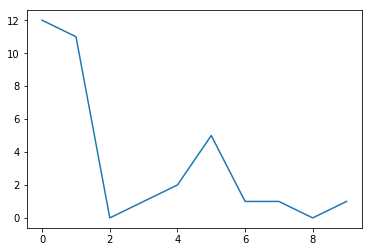

In [35]:
plt.plot(bundle_fc.metricValues.data[:10])

2.0 685.0
625.0
[  5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.]
26.6416666667


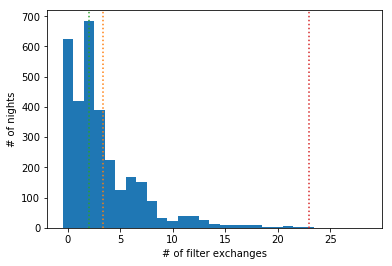

In [16]:
mask = bundle_fc.metricValues.data > .0
bins = np.arange(0.,30)
a = plt.hist(np.array(bundle_fc.metricValues.data[mask]),bins=bins-0.5)

mean_val = np.mean(np.array(bundle_fc.metricValues.data[mask]))
ylim = plt.ylim()
print(bins[np.argmax(a[0])],np.max(a[0]))
print(a[0][0])
print(bins[5:])
print(np.sum(a[0][5:]*bins[5:-1])*2/60./8.)
# plt.plot([mean_val,mean_val], ylim, ':')
plt.plot([bundle_fc.summaryValues['Mean'],bundle_fc.summaryValues['Mean']],ylim,':')
plt.plot([bins[np.argmax(a[0])],bins[np.argmax(a[0])]],ylim,':')
plt.plot([bundle_fc.summaryValues['Max'],bundle_fc.summaryValues['Max']],ylim,':')
plt.ylim(ylim)

plt.ylabel('# of nights')
plt.xlabel('# of filter exchanges')

Looking at altitude/airmass distribution.

In [60]:
m_count = metrics.PassMetric('altitude', metricName='Altitude')
slicer_observation = slicers.OneDSlicer(sliceColName='observationId') #, bins=np.arange(0.5,3651))
# s = slicers.HealpixSlicer(nside=128, lonCol='fieldRA', latCol='fieldDec', latLonDeg=True)
sql = '%s' % (wfdWhere) #'(filter == \"u\") and (%s)' % (wfdWhere)
plotDict = {'figsize':(10, 8), 'xlabel':'Number of visits', 'raCen': 0.,
            'title': 'Number of visits in u, WFD',
            'colorMin':54, 'colorMax': 68}
plotFuncs=[plots.BaseSkyMap()]


bundle_altitude = mb.MetricBundle(m_count, slicer_observation, sql) #, plotDict=plotDict, plotFuncs=plotFuncs)
bg = mb.MetricBundleGroup({0:bundle_altitude}, o)
bg.runAll()

Querying database SummaryAllProps with constraint proposalId = 3 for columns ['observationId', 'altitude']
Found 2037211 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [61]:
summaryMetrics = [metrics.SumMetric(),metrics.MeanMetric(), metrics.RmsMetric(),metrics.MaxMetric()]
bundle_altitude.setSummaryMetrics(summaryMetrics)
# bundle_altitude.computeSummaryStats()

In [39]:
bundle_altitude.summaryValues

{}

In [40]:
print(len(bundle_altitude.metricValues))

133


In [46]:
bundle_altitude.metricValues.data[0]['altitude']

array([ 84.64458251,  23.78610675,  57.43902414, ...,  56.77107191,
        56.78014315,  56.78893796])

In [47]:
bundle_altitude.metricValues.data[0]['observationId']

array([    1,     2,     3, ..., 17777, 17778, 17779])

In [62]:
alt_size = np.sum(np.array([len(i) for i in bundle_altitude.metricValues.data]))
# print(alt_size)
altitude = np.zeros(alt_size)
bsize1 = len(bundle_altitude.metricValues.data)
start_index = 0

for i in range(bsize1):
    bsize2 = len(bundle_altitude.metricValues.data[i]['altitude'])
    altitude[start_index:start_index+bsize2] += bundle_altitude.metricValues.data[i]['altitude']
    start_index+=bsize2


69.6821164592 9.11728471691
0 34
0.0 33
52353.0 32
127545.0 31
229411.0 30
359489.0 29
506035.0 28
647644.0 27
806695.0 26
960860.0 25
1107523.0 24
1243229.0 23
PerCent: 0.676745
63.0


(0.0, 167003.54999999999)

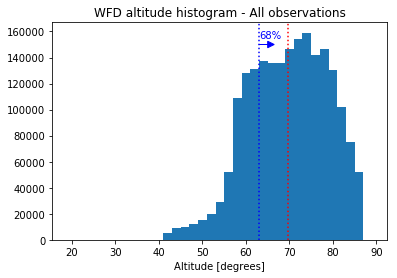

In [110]:
bsize = 2.

mean_altitude = np.mean(altitude)
std_altitude = np.std(altitude)
print(mean_altitude, std_altitude)
plt.title('WFD altitude histogram - All observations')
bins = np.arange(20.,90.+bsize,bsize)-bsize/2.
hist_res = plt.hist(altitude, bins = bins)

total = np.sum(hist_res[0])
tier_1 = 0
ntier_1 = len(hist_res[0])-1
for i in range(len(hist_res[0])):
    if (tier_1+hist_res[0][ntier_1])*1.0 > total*0.68:
        break
    print(tier_1, ntier_1)
    tier_1 += hist_res[0][ntier_1]
    ntier_1 -= 1 

print("PerCent: %f" % (tier_1*1./total))
ylim = plt.ylim()
# plt.plot([mean_altitude+std_altitude,mean_altitude+std_altitude],ylim,'r:')
plt.plot([mean_altitude,mean_altitude],ylim,'r:')
plt.plot([bins[ntier_1],bins[ntier_1]],ylim,'b:')
print(bins[ntier_1])
plt.arrow(bins[ntier_1], 150e3, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')
# plt.plot([mean_altitude-std_altitude,mean_altitude-std_altitude],ylim,'r:')
plt.annotate('68%',
            xy=(bins[ntier_1], 155e3), xycoords='data',color='b')

plt.xlabel('Altitude [degrees]')
plt.ylim(ylim)

Calculates progress over time

In [23]:
filter_list = ['y', 'z', 'i', 'r', 'g', 'u']

counting_metric = metrics.CountMetric('fieldRA', metricName='CountMetric')
bins=np.arange(0,3649,6)-3.
# bins=np.arange(0,30,1)-0.5
slicer_night = slicers.OneDSlicer(sliceColName='night',bins=bins) 
sql = '%s and filter = "%s"' # WFD 

bundle_dict = {}
for ff in filter_list:
    bundle_dict[ff] = mb.MetricBundle(counting_metric, slicer_night, sql % (wfdWhere,ff))
    
bg = mb.MetricBundleGroup(bundle_dict, o)    
bg.runAll()

Querying database Summary with constraint propID = 3 and filter = "r" for columns ['fieldRA', 'night']
Found 458193 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database Summary with constraint propID = 3 and filter = "g" for columns ['fieldRA', 'night']
Found 201418 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database Summary with constraint propID = 3 and filter = "y" for columns ['fieldRA', 'night']
Found 412827 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database Summary with constraint propID = 3 and filter = "z" for columns ['fieldRA', 'night']
Found 412056 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database Summary with constraint propID = 3 and filter = "u" for co

In [18]:
# bg.plotAll(closefigs=False)
print

<function print>

In [12]:
print(bundle_dict['z'].slicer.slicePoints)
print(bundle_dict['z'].metricValues)
# print(wdf_progress['r'])

{'sid': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]), 'bins': array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
        17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,
        26.5,  27.5,  28.5])}
[-- 104.0 102.0 108.0 103.0 107.0 113.0 -- -- -- 396.0 29.0 49.0 304.0
 252.0 -- -- -- 442.0 212.0 -- -- 43.0 -- -- -- -- -- 409692.0]


In [24]:
wdf_progress = {}
for ff in filter_list:
    wdf_progress[ff] = np.zeros(len(bundle_dict[ff].metricValues)-1)
    for i in range(len(wdf_progress[ff])-1):
        wdf_progress[ff][i:] +=  bundle_dict[ff].metricValues[i]
#         print(ff,i,bundle_dict[ff].metricValues[i])

y 409963.0
z 410676.0
i 456211.0
r 455801.0
g 200108.0
u 142618.0
total: 2476440


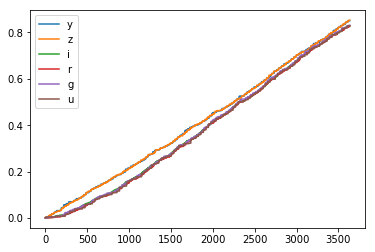

In [51]:
nights = (bins[1:]+bins[:-1])/2.
nights = nights[:-1]

nvisits = {'y' : 210,
'z' : 210,
'i' : 240,
'r' : 240,
'g' : 105,
'u' : 75}

nfields = 2293
total_visits_per_field = np.sum([i for i in nvisits.values()])
total_visits = nfields*total_visits_per_field


for ff in filter_list:
#     total_visits+=np.max(wdf_progress[ff])
    print(ff,np.max(wdf_progress[ff]))
#     plt.plot(nights/365., 
#              wdf_progress[ff]/np.max(wdf_progress[ff]) - wdf_progress['z']/np.max(wdf_progress['z']), 
#              label=ff)
#     plt.plot(nights, 
#              wdf_progress[ff]/(nvisits[ff]*nfields) - wdf_progress['z']/(nvisits['z']*nfields), 
#              label=ff,
#              ls='steps-mid')
    plt.plot(nights, 
             wdf_progress[ff]/(nvisits[ff]*nfields), 
             label=ff,
             ls='steps-mid')


plt.legend()
print('total:',total_visits)

Quantos % do tempo de telescopio esta sendo dedicado a cada filtro?

Isso é basicamente o numero de visitas em cada filtro multiplicado pelo tempo de cada visita ~ 34s dividido pelo "numero de visitas disponíveis" (NDV). Podemos considerar NVD aproximadamente como o numero de visitas total acumulado até uma determinada noite. Note que NVD cresce a medida que o levantamento evolui. Por exemplo, se no dia 1 fizemos 1000 visitas e no dia 2 outras 1000 visitas, NVD no dia 1 será 1000 e 2000 no dia 2. 


In [44]:
nvd = np.zeros(len(nights))
for i in range(len(nights)):
#     print([wdf_progress[ff][i] for ff in filter_list])
    nvd[i] += np.sum(np.array([wdf_progress[ff][i] for ff in filter_list]))

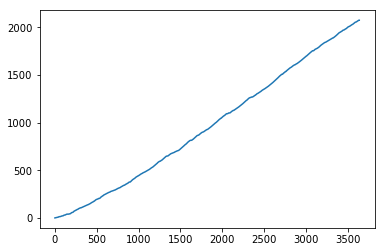

In [45]:
plt.plot(nights, nvd/1e3)

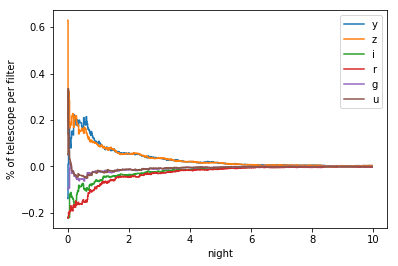

In [56]:
for ff in filter_list:
    plt.plot(nights/365., 
             wdf_progress[ff]/nvd-nvisits[ff]/total_visits_per_field, 
             label=ff,
             ls='steps-mid')
#     plt.plot([nights[0],nights[-1]],
#              [nvisits[ff]/total_visits_per_field,nvisits[ff]/total_visits_per_field],
#             'k:')
# plt.plot(nights, nvd,label='nvd')
plt.legend()
plt.xlabel('night')
plt.ylabel('% of telescope per filter')
xlim = plt.xlim()
# plt.xlim(xlim[0],365)